# Overlap reproduction
This notebook should reproduce the figures of the Amit's book (Attractor Neural Networks) iin the section 4.1

In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hopfield import Hopfield

%matplotlib inline
sns.set(font_scale=2.0)




First we build the network

In [2]:
n_dim = 400
n_store = 7
list_of_patterns = [np.sign(np.random.normal(size=n_dim)) for i in range(n_store)]

nn = Hopfield(n_dim=n_dim, T=0.8)
nn.train(list_of_patterns)

Then we run the network

In [3]:
print('overlap', nn.calculate_overlap())
print('state distance', nn.calculate_state_distance())

print('Simulating')

N = 50
overlaps = np.zeros((N, n_store))
for i in range(N):
    nn.update_async()
    overlaps[i, :] = nn.calculate_overlap()

print('Done')
print('overlap', nn.calculate_overlap())
print('state distance', nn.calculate_state_distance())

('overlap', array([ 0.03 ,  0.005, -0.055,  0.01 , -0.03 , -0.065, -0.01 ]))
('state distance', array([ 27.85677655,  28.21347196,  29.05167809,  28.14249456,
        28.70540019,  29.18903904,  28.42534081]))
Simulating
Done
('overlap', array([ 0.035,  0.04 , -0.06 ,  0.055, -0.065, -0.14 , -0.015]))
('state distance', array([ 27.78488798,  27.71281292,  29.12043956,  27.49545417,
        29.18903904,  30.19933774,  28.4956137 ]))


#### Ploting

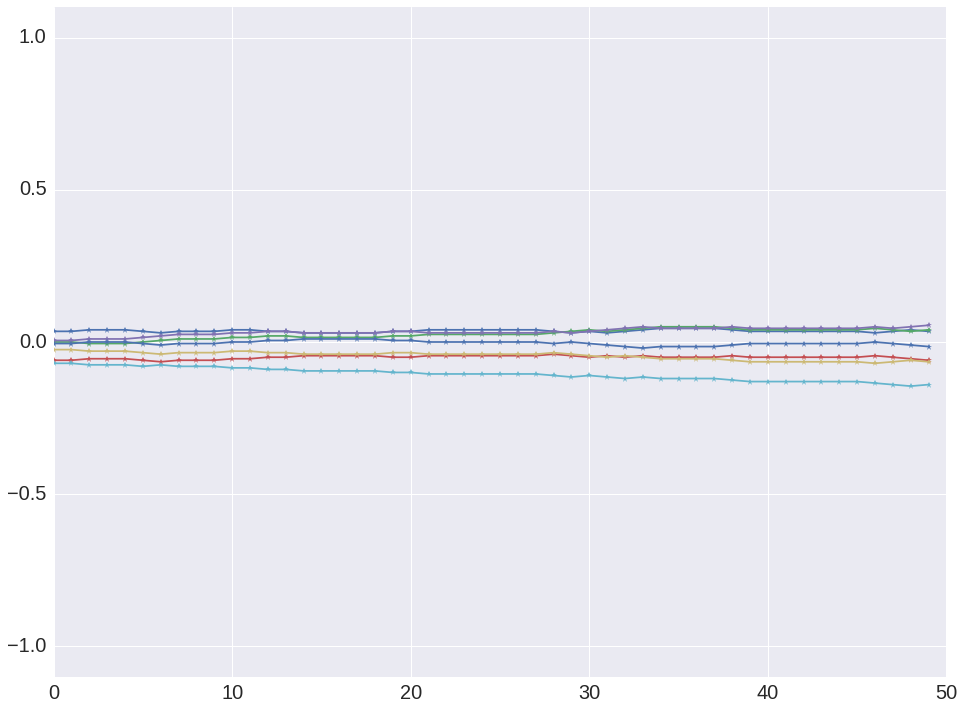

In [4]:
# Plot this thing
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for overlap in overlaps.T:
    ax.plot(overlap, '*-')

ax.set_ylim(-1.1, 1.1)

plt.show()